<a href="https://colab.research.google.com/github/syedokun/HAD7001/blob/main/Datathon_3/Datathon_3_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Environment setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
source_df = pd.read_csv('/content/Datathon #3 Dataset - HAD7001.csv')

## EDA

In [4]:
cardio_patients = source_df[source_df['apache_3j_bodysystem'] == 'Cardiovascular']
cardio_patients.shape

(29999, 186)

In [5]:
clean_columns = [
    'age',
    'gender',
    'weight',
    'pre_icu_los_days',
    'readmission_status',
    'ventilated_apache',
    'd1_heartrate_max',
    'd1_resprate_min',
    'd1_sysbp_max',
    'd1_hemaglobin_max',
    'd1_sodium_max',
    'd1_creatinine_max',
    'hepatic_failure',
    'diabetes_mellitus',
    'leukemia',
    'lymphoma',
    'solid_tumor_with_metastasis',
    'temp_apache',
    'd1_bun_max',
    'd1_glucose_max',
    'd1_wbc_max',
    'd1_hco3_max',
    'hospital_death'
    ]

In [6]:
cleaned_cardio_patients = cardio_patients[clean_columns]

In [7]:
numeric_features = cleaned_cardio_patients.select_dtypes(include=np.number)
correlation_matrix = numeric_features.corr()

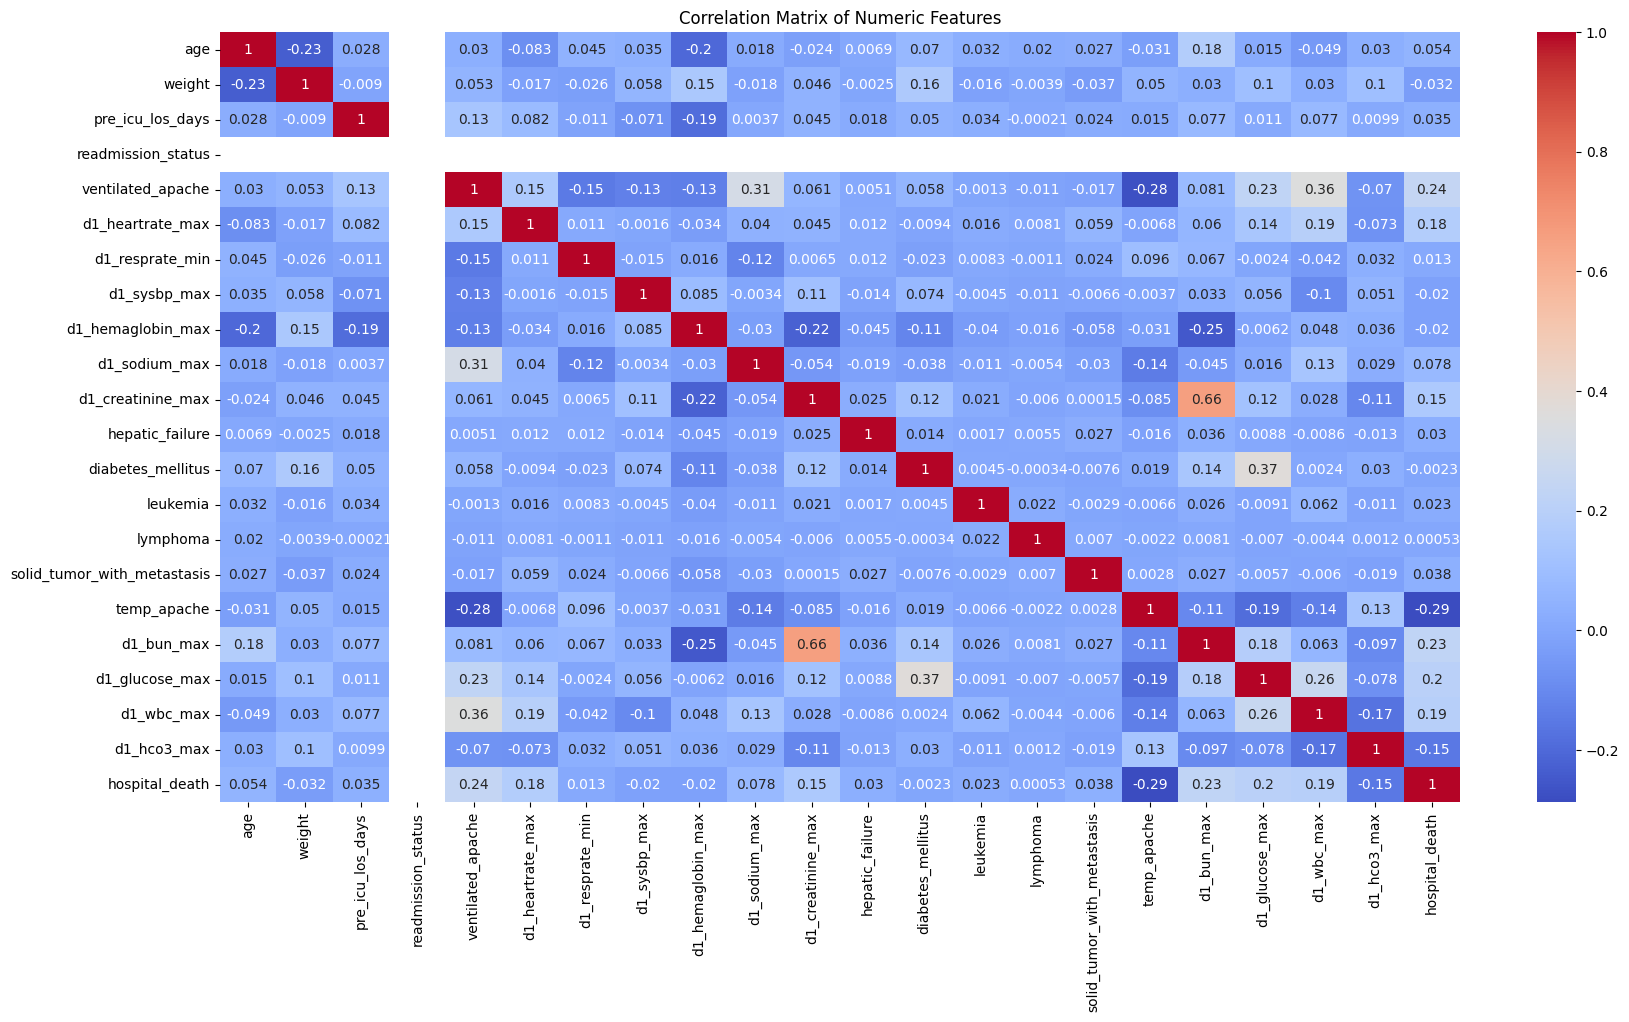

In [8]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [9]:
#Ensuring data was imported and displayed correctly
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Fitting the neural network

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from imblearn.over_sampling import RandomOverSampler

X = cleaned_cardio_patients.drop('hospital_death', axis=1)
y = cleaned_cardio_patients['hospital_death']

X = pd.get_dummies(X, columns=X.select_dtypes(exclude=np.number).columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

import tensorflow as tf

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Recall()])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1241/1241 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7600 - loss: 0.5002 - recall: 0.7342 - val_accuracy: 0.8170 - val_loss: 0.4328 - val_recall: 0.8170
Epoch 2/10
1241/1241 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8065 - loss: 0.4277 - recall: 0.7756 - val_accuracy: 0.8003 - val_loss: 0.4683 - val_recall: 0.8003
Epoch 3/10
1241/1241 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8113 - loss: 0.4100 - recall: 0.7910 - val_accuracy: 0.8198 - val_loss: 0.4228 - val_recall: 0.8198
Epoch 4/10
1241/1241 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8158 - loss: 0.4017 - recall: 0.8004 - val_accuracy: 0.8320 - val_loss: 0.4169 - val_recall: 0.8320
Epoch 5/10
1241/1241 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8244 - loss: 0.3914 - recall: 0.8177 - val_accuracy: 0.8375 - val_loss: 0.3947 - val_recall: 0.8375
Epoch 6/10
1241/1241 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8241 - loss: 0.3880 - recall: 0.8141 - val_accuracy: 0.8254 - val_loss: 0.4204 - val_recall:

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to binary predictions

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC Score: {auc}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8333333333333334
Precision: 0.2747163695299838
Recall: 0.7635135135135135
F1 Score: 0.40405244338498214
AUC Score: 0.8830523287866701


In [12]:
X.shape

(29999, 23)

## Hyperparameter tuning

In [13]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.6 MB/s eta 0:00:00


### Optimizing for accuracy

In [14]:
import keras_tuner as kt

def model_builder(hp):
    model = keras.Sequential()

    for i in range(hp.Int('num_hidden_layers', min_value=1, max_value=3)):
        model.add(layers.Dense(hp.Int(f'units_layer{i}', min_value=32, max_value=256, step=64), activation='relu'))

    # hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    # model.add(layers.Dense(units=hp_units, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Recall()])
    return model

tuner = kt.Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='datathon_3',
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

Trial 30 Complete [00h 00m 51s]
val_accuracy: 0.9806166291236877

Best val_accuracy So Far: 0.9905917048454285
Total elapsed time: 00h 10m 42s


In [15]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_hps)
model.fit(X_train, y_train, epochs=best_hps.get('tuner/epochs'), validation_split=0.2)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC Score: {auc}")

Epoch 1/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8021 - loss: 0.4293 - recall_3: 0.7125 - val_accuracy: 0.7756 - val_loss: 0.4770 - val_recall_3: 0.7756
Epoch 2/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8415 - loss: 0.3495 - recall_3: 0.7873 - val_accuracy: 0.8675 - val_loss: 0.3615 - val_recall_3: 0.8675
Epoch 3/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8725 - loss: 0.2884 - recall_3: 0.8468 - val_accuracy: 0.9013 - val_loss: 0.2900 - val_recall_3: 0.9013
Epoch 4/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9087 - loss: 0.2221 - recall_3: 0.9082 - val_accuracy: 0.9480 - val_loss: 0.1842 - val_recall_3: 0.9480
Epoch 5/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9338 - loss: 0.1727 - recall_3: 0.9393 - val_accuracy: 0.8843 - val_loss: 0.3076 - val_recall_3: 0.8843
Epoch 6/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9517 - loss: 0.1301 - recall_3: 0.9596 - val_accuracy: 0.9106 - val_los

In [16]:
print(f"Best Hyperparameters: {best_hps.values}")

Best Hyperparameters: {'num_hidden_layers': 3, 'units_layer0': 224, 'units_layer1': 224, 'units_layer2': 224, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0022'}


In [18]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

tuner_results = tuner.results_summary()

hyperparameters = []
val_accuracies = []

for trial in tuner.oracle.trials.values():
    hyperparameters.append(trial.hyperparameters.values)
    val_accuracies.append(trial.metrics.get_best_value('val_accuracy'))

Results summary
Results in my_dir/datathon_3
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0024 summary
Hyperparameters:
num_hidden_layers: 3
units_layer0: 224
units_layer1: 224
units_layer2: 224
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0022
Score: 0.9905917048454285

Trial 0016 summary
Hyperparameters:
num_hidden_layers: 3
units_layer0: 224
units_layer1: 160
units_layer2: 160
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
Score: 0.9861709475517273

Trial 0029 summary
Hyperparameters:
num_hidden_layers: 3
units_layer0: 96
units_layer1: 96
units_layer2: 224
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.9806166291236877

Trial 0017 summary
Hyperparameters:
num_hidden_layers: 3
units_layer0: 96
units_layer1: 224
units_layer2: 96
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.97

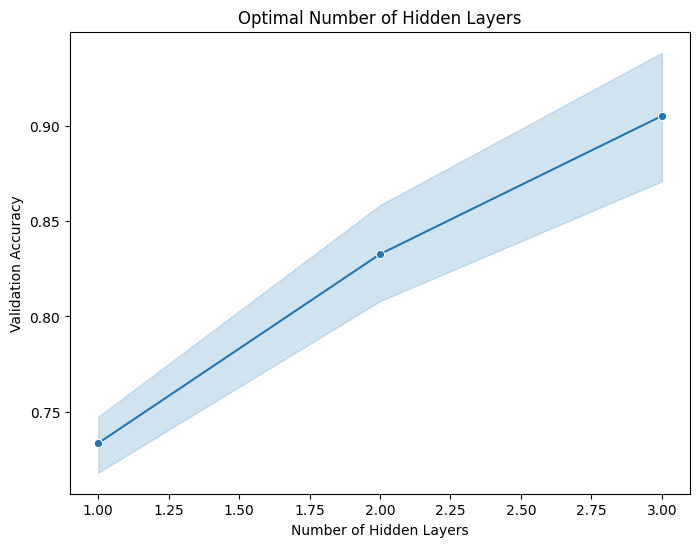

In [19]:
plt.figure(figsize=(8, 6))
plt.title('Optimal Number of Hidden Layers')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Validation Accuracy')

num_hidden_layers = [trial.hyperparameters.get('num_hidden_layers') for trial in tuner.oracle.trials.values()]

sorted_hidden_layers_accuracies = sorted(zip(num_hidden_layers, val_accuracies))
sorted_hidden_layers, sorted_accuracies_hidden = zip(*sorted_hidden_layers_accuracies)

sns.lineplot(x=sorted_hidden_layers, y=sorted_accuracies_hidden, marker='o')
plt.show()


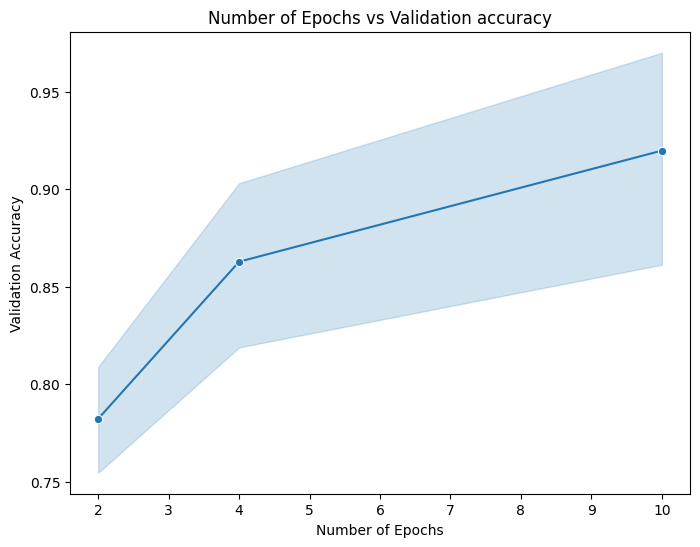

In [20]:
plt.figure(figsize=(8, 6))
plt.title('Number of Epochs vs Validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Validation Accuracy')

num_epochs = [trial.hyperparameters.get('tuner/epochs') for trial in tuner.oracle.trials.values()]

sorted_epoch_accuracies = sorted(zip(num_epochs, val_accuracies))
sorted_epochs, sorted_accuracies_hidden = zip(*sorted_epoch_accuracies)

sns.lineplot(x=sorted_epochs, y=sorted_accuracies_hidden, marker='o')
plt.show()

<Figure size 1200x800 with 0 Axes>

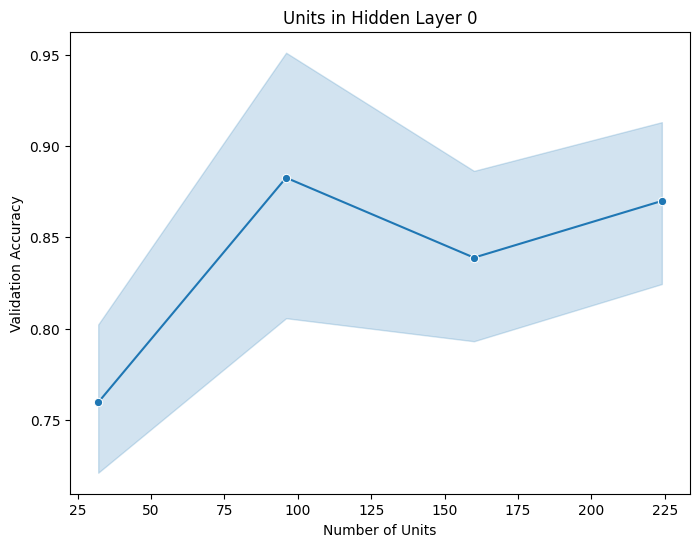

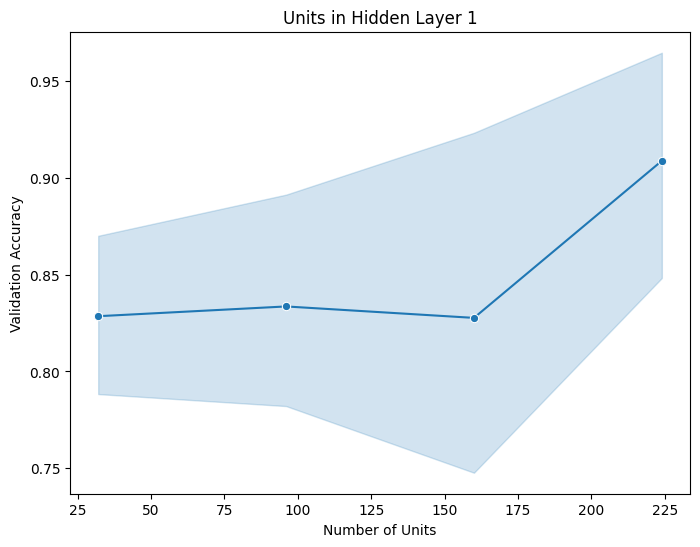

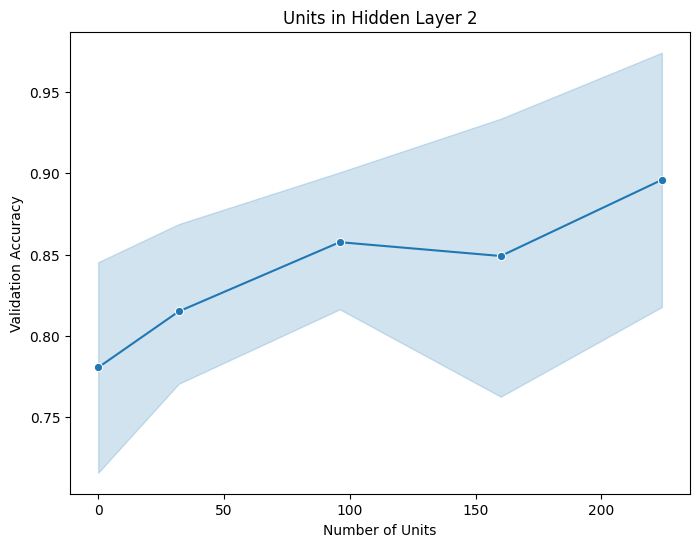

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

for i in range(0, 3):
    units_layer_i = []
    for trial in tuner.oracle.trials.values():
        if f'units_layer{i}' in trial.hyperparameters.values:
          units_layer_i.append(trial.hyperparameters.get(f'units_layer{i}'))
        else:
          units_layer_i.append(0)

    combined = list(zip(units_layer_i, val_accuracies))
    combined.sort(key=lambda x: x[0])
    units_layer_i, val_accuracies_i = zip(*combined)

    plt.figure(figsize=(8, 6))
    sns.lineplot(x=units_layer_i, y=val_accuracies_i, marker='o')
    plt.title(f'Units in Hidden Layer {i}')
    plt.xlabel('Number of Units')
    plt.ylabel('Validation Accuracy')
    plt.show()


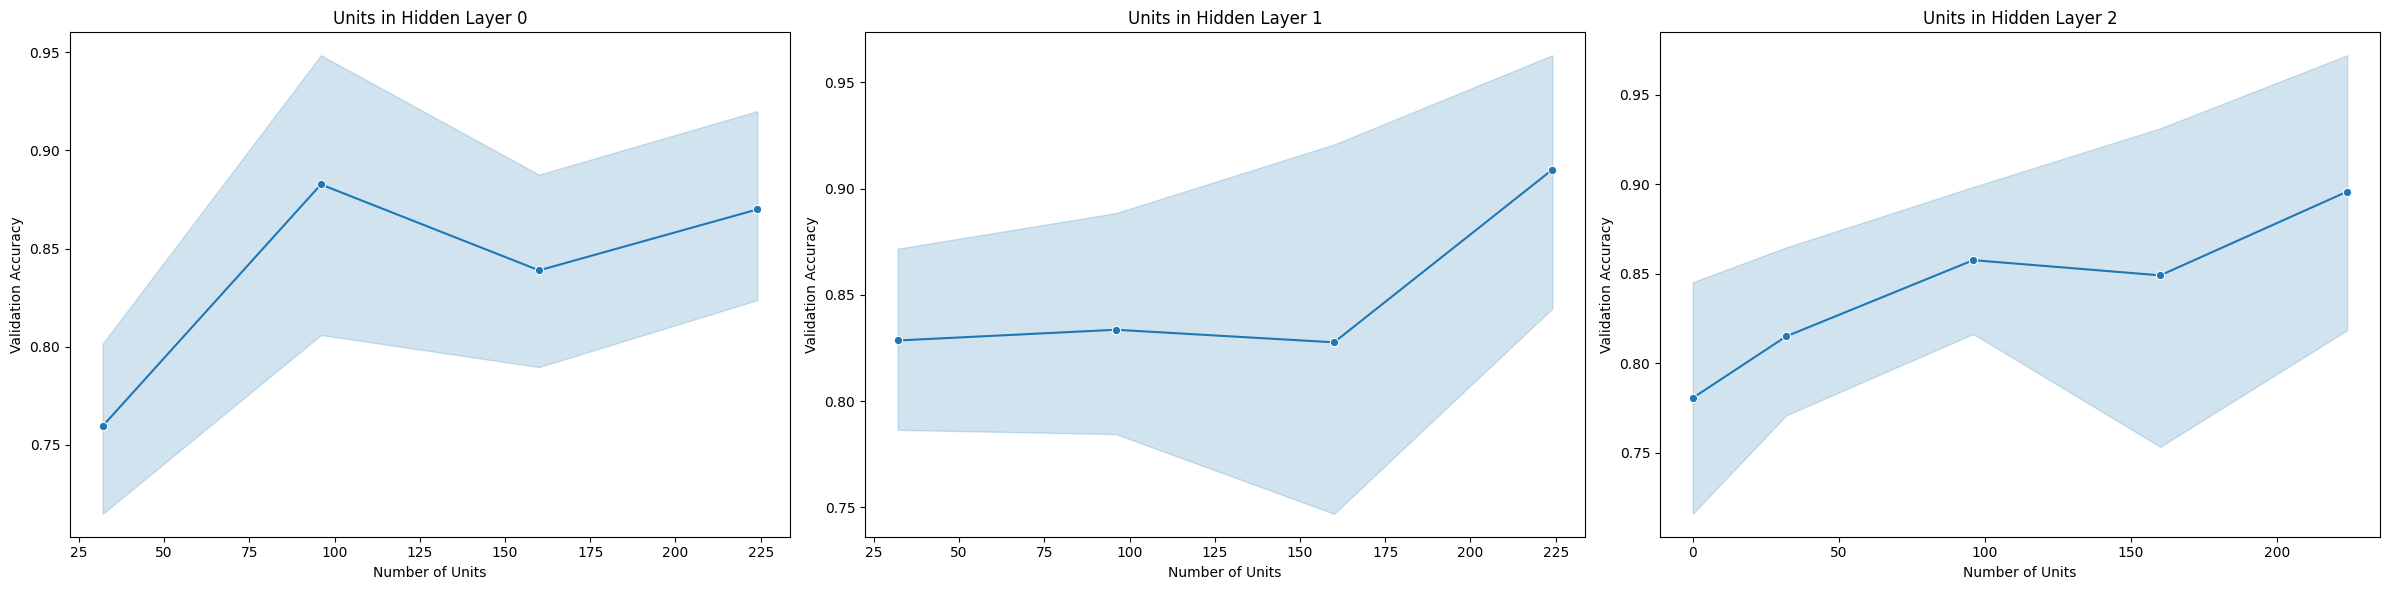

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24, 6))

for i in range(0, 3):
    units_layer_i = []
    for trial in tuner.oracle.trials.values():
        if f'units_layer{i}' in trial.hyperparameters.values:
          units_layer_i.append(trial.hyperparameters.get(f'units_layer{i}'))
        else:
          units_layer_i.append(0)

    combined = list(zip(units_layer_i, val_accuracies))
    combined.sort(key=lambda x: x[0])
    units_layer_i, val_accuracies_i = zip(*combined)

    plt.subplot(1, 3, i + 1)
    sns.lineplot(x=units_layer_i, y=val_accuracies_i, marker='o')
    plt.title(f'Units in Hidden Layer {i}')
    plt.xlabel('Number of Units')
    plt.ylabel('Validation Accuracy')

plt.tight_layout()
plt.show()

### Optimizing for recall

In [23]:
import keras_tuner as kt

def model_builder(hp):
    model = keras.Sequential()

    for i in range(hp.Int('num_hidden_layers', min_value=1, max_value=3)):
        model.add(layers.Dense(hp.Int(f'units_layer{i}', min_value=32, max_value=256, step=64), activation='relu'))

    # hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    # model.add(layers.Dense(units=hp_units, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Recall()])
    return model

tuner = kt.Hyperband(
    model_builder,
    objective='val_recall',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='datathon_3',
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

Reloading Tuner from my_dir/datathon_3/tuner0.json


In [24]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_hps)
model.fit(X_train, y_train, epochs=best_hps.get('tuner/epochs'), validation_split=0.2)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC Score: {auc}")

Epoch 1/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7991 - loss: 0.4264 - recall_5: 0.7125 - val_accuracy: 0.8071 - val_loss: 0.4652 - val_recall_5: 0.8071
Epoch 2/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8382 - loss: 0.3508 - recall_5: 0.7949 - val_accuracy: 0.8537 - val_loss: 0.3929 - val_recall_5: 0.8537
Epoch 3/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8756 - loss: 0.2881 - recall_5: 0.8577 - val_accuracy: 0.8550 - val_loss: 0.3864 - val_recall_5: 0.8550
Epoch 4/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9064 - loss: 0.2266 - recall_5: 0.9033 - val_accuracy: 0.9137 - val_loss: 0.2405 - val_recall_5: 0.9137
Epoch 5/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9328 - loss: 0.1693 - recall_5: 0.9353 - val_accuracy: 0.9610 - val_loss: 0.1481 - val_recall_5: 0.9610
Epoch 6/10
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9520 - loss: 0.1270 - recall_5: 0.9578 - val_accuracy: 0.9703 - val_loss

In [25]:
print(f"Best Hyperparameters: {best_hps.values}")

Best Hyperparameters: {'num_hidden_layers': 3, 'units_layer0': 224, 'units_layer1': 224, 'units_layer2': 224, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0022'}


In [29]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

tuner_results = tuner.results_summary()

hyperparameters = []
val_recalls = []

for trial in tuner.oracle.trials.values():
    hyperparameters.append(trial.hyperparameters.values)
    val_recalls.append(trial.metrics.get_best_value('val_recall'))

Results summary
Results in my_dir/datathon_3
Showing 10 best trials
Objective(name="val_recall", direction="max")

Trial 0024 summary
Hyperparameters:
num_hidden_layers: 3
units_layer0: 224
units_layer1: 224
units_layer2: 224
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0022
Score: 0.9905917048454285

Trial 0016 summary
Hyperparameters:
num_hidden_layers: 3
units_layer0: 224
units_layer1: 160
units_layer2: 160
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
Score: 0.9861709475517273

Trial 0029 summary
Hyperparameters:
num_hidden_layers: 3
units_layer0: 96
units_layer1: 96
units_layer2: 224
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.9806166291236877

Trial 0017 summary
Hyperparameters:
num_hidden_layers: 3
units_layer0: 96
units_layer1: 224
units_layer2: 96
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.9782

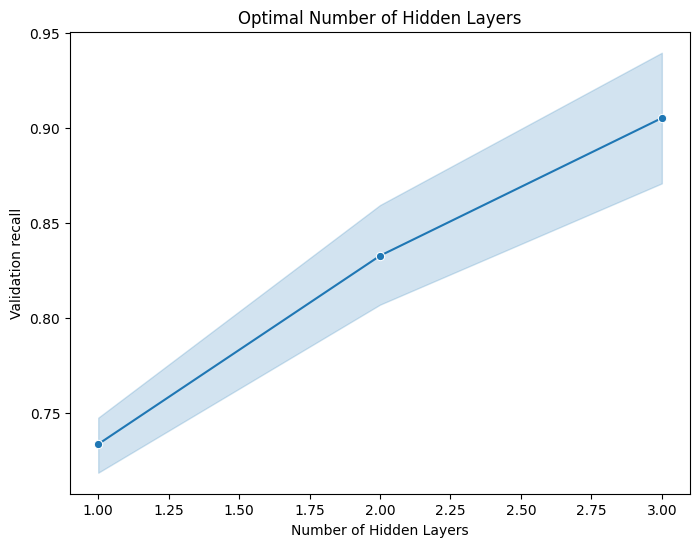

In [30]:
plt.figure(figsize=(8, 6))
plt.title('Optimal Number of Hidden Layers')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Validation recall')
num_hidden_layers = [trial.hyperparameters.get('num_hidden_layers') for trial in tuner.oracle.trials.values()]

sorted_hidden_layers_recalls = sorted(zip(num_hidden_layers, val_recalls))
sorted_hidden_layers, sorted_recalls_hidden = zip(*sorted_hidden_layers_recalls)

sns.lineplot(x=sorted_hidden_layers, y=sorted_recalls_hidden, marker='o')
plt.show()


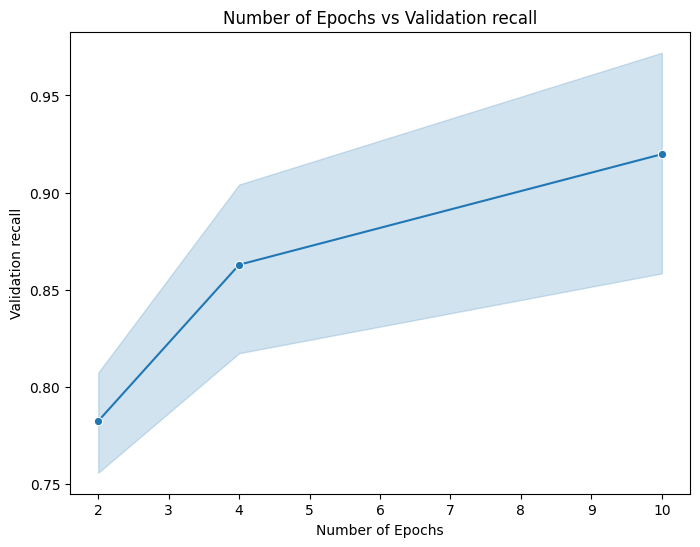

In [31]:
plt.figure(figsize=(8, 6))
plt.title('Number of Epochs vs Validation recall')
plt.xlabel('Number of Epochs')
plt.ylabel('Validation recall')

num_epochs = [trial.hyperparameters.get('tuner/epochs') for trial in tuner.oracle.trials.values()]

sorted_epoch_recalls = sorted(zip(num_epochs, val_recalls))
sorted_epochs, sorted_recalls_hidden = zip(*sorted_epoch_recalls)

sns.lineplot(x=sorted_epochs, y=sorted_recalls_hidden, marker='o')
plt.show()

<Figure size 1200x800 with 0 Axes>

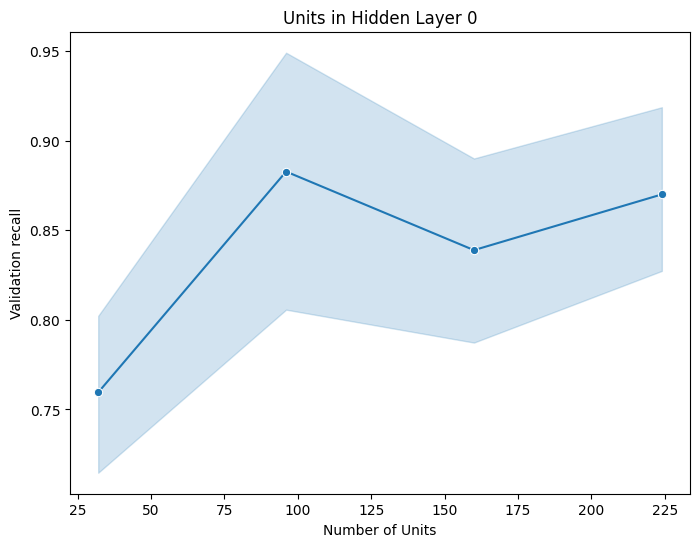

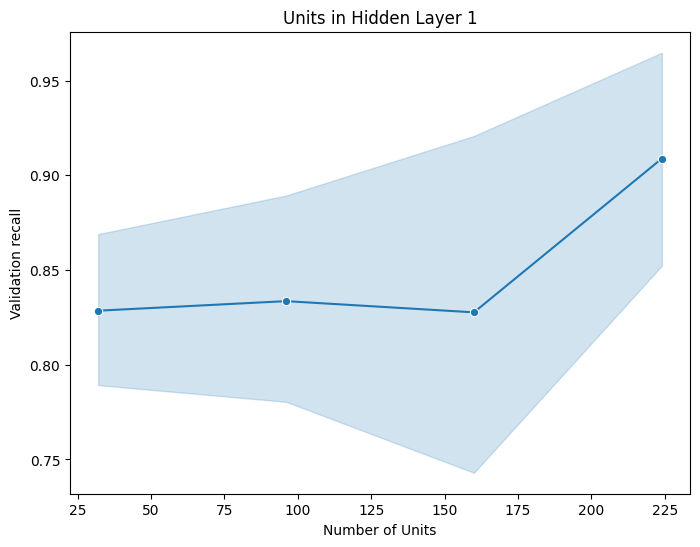

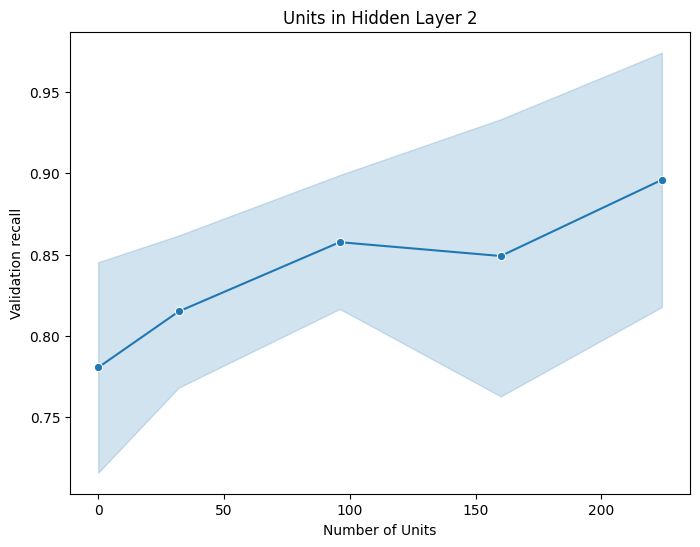

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

for i in range(0, 3):
    units_layer_i = []
    for trial in tuner.oracle.trials.values():
        if f'units_layer{i}' in trial.hyperparameters.values:
          units_layer_i.append(trial.hyperparameters.get(f'units_layer{i}'))
        else:
          units_layer_i.append(0)

    combined = list(zip(units_layer_i, val_recalls))
    combined.sort(key=lambda x: x[0])
    units_layer_i, val_recalls_i = zip(*combined)

    plt.figure(figsize=(8, 6))
    sns.lineplot(x=units_layer_i, y=val_recalls_i, marker='o')
    plt.title(f'Units in Hidden Layer {i}')
    plt.xlabel('Number of Units')
    plt.ylabel('Validation recall')
    plt.show()


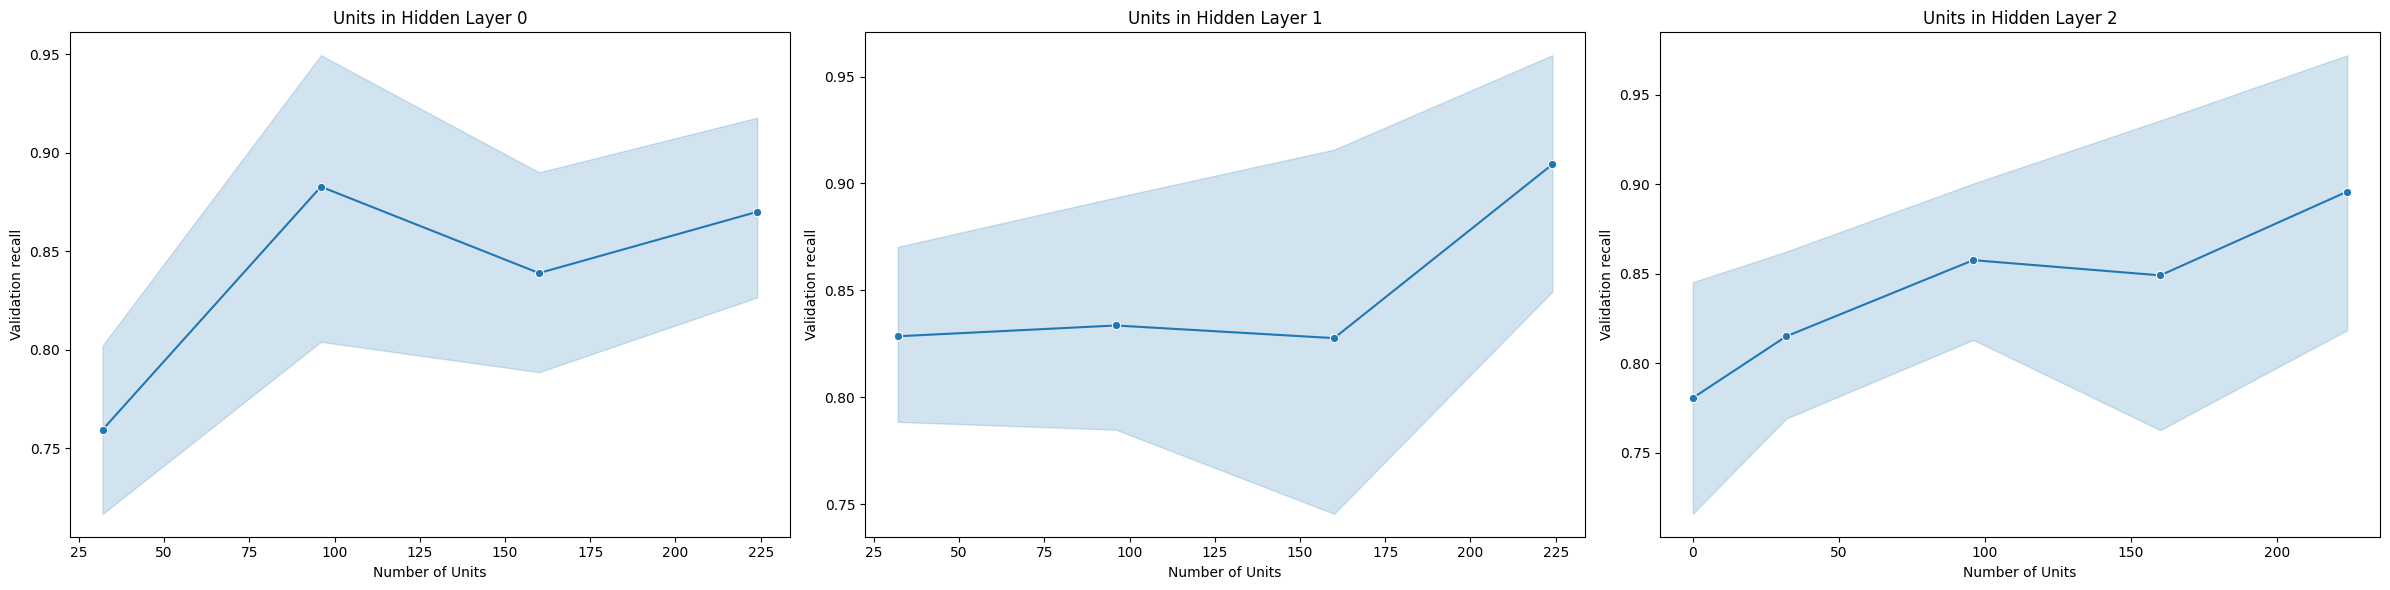

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24, 6))

for i in range(0, 3):
    units_layer_i = []
    for trial in tuner.oracle.trials.values():
        if f'units_layer{i}' in trial.hyperparameters.values:
          units_layer_i.append(trial.hyperparameters.get(f'units_layer{i}'))
        else:
          units_layer_i.append(0)

    combined = list(zip(units_layer_i, val_recalls))
    combined.sort(key=lambda x: x[0])
    units_layer_i, val_recalls_i = zip(*combined)

    plt.subplot(1, 3, i + 1)
    sns.lineplot(x=units_layer_i, y=val_recalls_i, marker='o')
    plt.title(f'Units in Hidden Layer {i}')
    plt.xlabel('Number of Units')
    plt.ylabel('Validation recall')

plt.tight_layout()
plt.show()